In [1]:
# the python toolkit for data analysis and visualistion. 
# more or less to doing library(tidyverse) (without going into details).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# the datasets:
# breed_traits <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')
# trait_description <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/trait_description.csv')
# breed_rank_all <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_rank.csv')

breed_traits = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')
trait_description = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/trait_description.csv')
breed_rank_all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_rank.csv')

In [3]:
breed_traits.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3


In [4]:
trait_description.head()

,Trait,Trait_1,Trait_5,Description
0,Affectionate With Family,Independent,Lovey-Dovey,How affectionate a breed is likely to be with ...
1,Good With Young Children,Not Recommended,Good With Children,A breed's level of tolerance and patience with...
2,Good With Other Dogs,Not Recommended,Good With Other Dogs,How generally friendly a breed is towards othe...
3,Shedding Level,No Shedding,Hair Everywhere,How much fur and hair you can expect the breed...
4,Coat Grooming Frequency,Monthly,Daily,"How frequently a breed requires bathing, brush..."


In [5]:
breed_rank_all.head()

,Breed,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank,links,Image
0,Retrievers (Labrador),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,https://www.akc.org/dog-breeds/labrador-retrie...,https://www.akc.org/wp-content/uploads/2017/11...
1,French Bulldogs,11.0,9.0,6.0,6.0,4.0,4.0,4.0,2,https://www.akc.org/dog-breeds/french-bulldog/,https://www.akc.org/wp-content/uploads/2017/11...
2,German Shepherd Dogs,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,https://www.akc.org/dog-breeds/german-shepherd...,https://www.akc.org/wp-content/uploads/2017/11...
3,Retrievers (Golden),3.0,3.0,3.0,3.0,3.0,3.0,3.0,4,https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11...
4,Bulldogs,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11...


Now, let's try to build a plot that will track the top 10 dogs by rank over the period the data is avaiable. Did they change places? In R this is a simple line plot with the seconday axis trick for readibility. First we prepare the data. Note that for the seconday axis we will use a separate dataframe. Also, I am doing an extra transformation here with creating a `year` variable of class `date`, as opposed to the `dbl` one. Not sure if it is going to be used though.

In [6]:
#R: Prepere the data
# top_rated_dogs_long <- top_rated_dogs %>% 
#  select(breed = Breed, ends_with("Rank")) %>% 
#  tidyr::pivot_longer(
#    cols = ends_with("Rank"),
#    names_to = "year_rank",
#    values_to = "rank"
#  ) %>% 
#  mutate(year_rank = readr::parse_number(year_rank)) %>% 
#  mutate(year = paste0(1,"-",1,"-",year_rank)) %>% 
#  mutate(year = lubridate::dmy(year)) 

#last_year <- top_rated_dogs_long %>% 
#  filter(year == as.Date("2020-01-01")) 

top_rated_dogs = breed_rank_all.head(10)

# apparently there are two ways to do the pivot in pandas
# pandas.wide_to_long and pandas.melt
# let's use melt; this reminds me of data.table.

top_rated_dogs_long = pd.melt(top_rated_dogs, 
                              id_vars = ['Breed'],
                              value_vars = ["2013 Rank" , "2014 Rank", "2015 Rank", "2016 Rank", 
                                            "2017 Rank", "2018 Rank", "2019 Rank", "2020 Rank"], 
                              var_name = "year_rank", 
                              value_name = "rank")

top_rated_dogs_long

,Breed,year_rank,rank
0,Retrievers (Labrador),2013 Rank,1.0
1,French Bulldogs,2013 Rank,11.0
2,German Shepherd Dogs,2013 Rank,2.0
3,Retrievers (Golden),2013 Rank,3.0
4,Bulldogs,2013 Rank,5.0
...,...,...,...
75,Poodles,2020 Rank,6.0
76,Beagles,2020 Rank,7.0
77,Rottweilers,2020 Rank,8.0
78,Pointers (German Shorthaired),2020 Rank,9.0


In [7]:
# next we need the year as a number
# here `assing` I think it is equivalent of `mutate`

top_rated_dogs_long = top_rated_dogs_long.assign(year = top_rated_dogs_long.year_rank.str.rstrip(' Rank').astype('int'))

In [8]:
# and as date
from datetime import datetime

top_rated_dogs_long = top_rated_dogs_long.assign(year_d = top_rated_dogs_long.year.map(lambda y: datetime(y, 1, 1)))

In [9]:
top_rated_dogs_long

,Breed,year_rank,rank,year,year_d
0,Retrievers (Labrador),2013 Rank,1.0,2013,2013-01-01
1,French Bulldogs,2013 Rank,11.0,2013,2013-01-01
2,German Shepherd Dogs,2013 Rank,2.0,2013,2013-01-01
3,Retrievers (Golden),2013 Rank,3.0,2013,2013-01-01
4,Bulldogs,2013 Rank,5.0,2013,2013-01-01
...,...,...,...,...,...
75,Poodles,2020 Rank,6.0,2020,2020-01-01
76,Beagles,2020 Rank,7.0,2020,2020-01-01
77,Rottweilers,2020 Rank,8.0,2020,2020-01-01
78,Pointers (German Shorthaired),2020 Rank,9.0,2020,2020-01-01


In [10]:
top_rated_dogs_long.dtypes

Breed                object
year_rank            object
rank                float64
year                  int64
year_d       datetime64[ns]
dtype: object

Seems we have the data in the needed format. I don't know if the same approach with secondary `y` axis is used in `matplotlib`, but let's make the same dataset as in `R`.

In [11]:
last_year = top_rated_dogs_long.query('year == 2020')
last_year

,Breed,year_rank,rank,year,year_d
70,Retrievers (Labrador),2020 Rank,1.0,2020,2020-01-01
71,French Bulldogs,2020 Rank,2.0,2020,2020-01-01
72,German Shepherd Dogs,2020 Rank,3.0,2020,2020-01-01
73,Retrievers (Golden),2020 Rank,4.0,2020,2020-01-01
74,Bulldogs,2020 Rank,5.0,2020,2020-01-01
75,Poodles,2020 Rank,6.0,2020,2020-01-01
76,Beagles,2020 Rank,7.0,2020,2020-01-01
77,Rottweilers,2020 Rank,8.0,2020,2020-01-01
78,Pointers (German Shorthaired),2020 Rank,9.0,2020,2020-01-01
79,Dachshunds,2020 Rank,10.0,2020,2020-01-01


Let's plot.

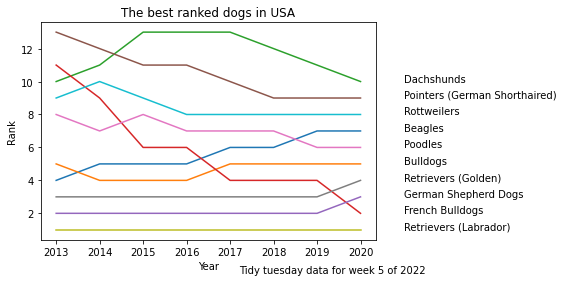

In [12]:
# R: ggplot(top_rated_dogs_long) +
#  aes(x = year, y = rank, color = breed) +
#  geom_line() +
#  theme_minimal() +
#  theme(legend.position = "none") +
#  scale_x_date(expand = expansion(mult = 0)) +
#  scale_y_continuous(limits = c(0, 15),
#  sec.axis = dup_axis(
#    breaks = last_year$rank,
#    labels = last_year$breed,
#    name = NULL)) +
#  labs(x = "Year", y = "Rank", title = "The best ranked dogs in USA", 
#       caption = "Tidy tuesday data for week 5 of 2022")

#import matplotx

fig, ax = plt.subplots()
top_rated_dogs_long.groupby("Breed").plot(kind = "line", x = "year", y = "rank", ax = ax)
ax.legend().set_visible(False)
ax.set(title = "The best ranked dogs in USA", 
       xlabel = "Year",
       ylabel = "Rank"
      )
txt="Tidy tuesday data for week 5 of 2022"
fig.text(0.80, 0.01, txt, ha='center')

for i in range(10):
    ax.text(x = 2021, y = last_year["rank"].iloc[i], s= last_year["Breed"].iloc[i]);

# Not the best of plots, but this is one way to do it.